In [1]:
import matplotlib.pyplot as plt                    
import seaborn as sns                            
import pandas as pd                               
from sklearn.naive_bayes import GaussianNB         # For naive Bayes classifier
from sklearn.metrics import plot_confusion_matrix  # Evaluation measures
from sklearn.model_selection import train_test_split  # For train-test split
import warnings                                       #For supressing warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# Rename all attribute columns. The last column is renamed to 'y'
df.columns = ['X' + str(i) for i in range(0, len(df.columns) - 1)] + ['y']

# Shows the first few lines of the data
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Specifies X by filtering all columns with a number in name
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# training data set
trn = X_trn
trn['y'] = y_trn

# Fetches the attributes X0 to X56 as X_trn
X_trn = trn.filter(regex='\d')

# Fetches the class variable as y_trn
y_trn = trn.y

# testing dataset
tst = X_tst
tst['y'] = y_tst

# Fetches the attributes X0 to X56 as X_tst
X_tst = tst.filter(regex='\d')

# Fetches the class variable as y_tst
y_tst = tst.y

# Class labels
spam = ['Not Spam','Spam']

trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
1507,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1652,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2279,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
2106,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
3688,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


- Create a 'GaussianNB' object to use the naive Bayes algorithm for classification. 

In [5]:
nb = GaussianNB().fit(X_trn, y_trn)

- Calculate mean accuracy on training data

In [6]:
print('Accuracy on training data: ' + str("{:.2%}".format(nb.score(X_trn, y_trn))))

Accuracy on training data: 82.20%


- For evaluation find the 'confusion matrix'

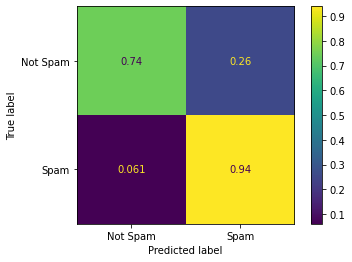

In [7]:
plot_confusion_matrix(
    nb, X_tst, y_tst,
    display_labels=spam,
    normalize='true')

- Calculate mean accuracy on testing data

In [8]:
print('Accuracy on testing data: ' + str("{:.2%}".format(nb.score(X_tst, y_tst))))

Accuracy on testing data: 82.04%
